반듯한(?) 형태를 얻기 위한 contour 근사

In [1]:
import cv2
import cv2_plus

In [2]:
imgfile = 'images/contour2.png'
img = cv2.imread(imgfile)

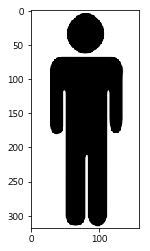

In [3]:
cv2_plus.imshow(img, img_type=1)

In [4]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
edge = cv2.Canny(imgray, 50, 100)

cv2.CHAIN_APPROX_SIMPLE 옵션은 **수평, 수직, 대각선 방향의 직선상에 놓인 점들은 모두 버리며, 끝 점만 가져온다(시간, 메모리)**(cv2.CHAIN_APPROX_NONE은 전부 가져옴)

In [6]:
edge, contours, hierarchy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

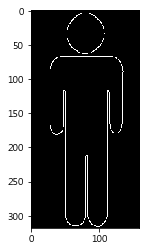

In [7]:
cv2_plus.imshow(edge, img_type=0)

contours의 class는 list 하지만 dtype을 봤을 때 contours 자체는 'O'(object)였다.

In [8]:
len(contours)

4

In [9]:
print(type(contours))

<class 'list'>


In [10]:
import numpy as np
contours_copy= np.array(contours)
print(contours_copy.shape)

(4,)


In [11]:
contours_copy.dtype

dtype('O')

In [12]:
contours_copy.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [13]:
print(contours_copy.shape)
print(contours_copy[0].shape)
print(contours_copy[1].shape)
print(contours_copy[2].shape)
print(contours_copy[3].shape)

(4,)
(126, 1, 2)
(120, 1, 2)
(81, 1, 2)
(77, 1, 2)


**contours[i][:]와 같이 접근**

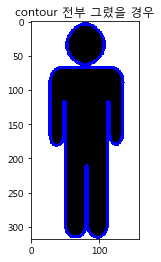

In [14]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours , -1, (255, 0 , 0), 4)
cv2_plus.imshow(img, title = 'contour 전부 그렸을 경우')

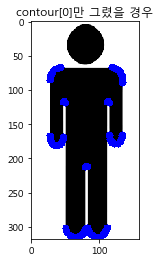

In [15]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours[0], -1, (255, 0 , 0), 10)
cv2_plus.imshow(img, title = 'contour[0]만 그렸을 경우')

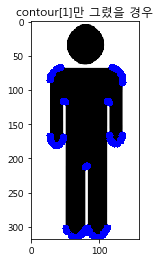

In [16]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours[1], -1, (255, 0 , 0), 10)
cv2_plus.imshow(img, title = 'contour[1]만 그렸을 경우')

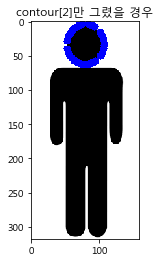

In [17]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours[2], -1, (255, 0 , 0), 10)
cv2_plus.imshow(img, title = 'contour[2]만 그렸을 경우')

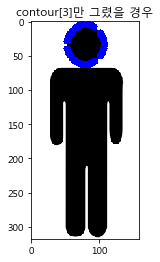

In [18]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours[3], -1, (255, 0 , 0), 10)
cv2_plus.imshow(img, title = 'contour[3]만 그렸을 경우')

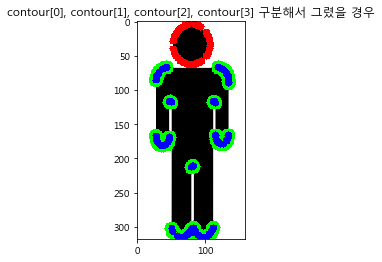

In [19]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours[0], -1, (0, 255, 0), 20)
cv2.drawContours(img, contours[1], -1, (255, 0 , 0), 10)
cv2.drawContours(img, contours[2], -1, (0, 0 , 255), 10)
cv2_plus.imshow(img, title = 'contour[0], contour[1], contour[2], contour[3] 구분해서 그렸을 경우')

**근데 위에서 모든 contour[0],contour[1],contour[2],contour[3]을 그렸지만 전체를 전체 윤곽을 그려주지 않는다.**<br>
그 이유는 바로 cv2.CHAIN_APPROX_SIMPLE 옵션 때문이다. 이 옵션은 **수평, 수직, 대각선 방향의 직선상에 놓인 점들은 모두 버리며, 끝 점만 가져온다**.<br>
만약 cv2.CHAIN_APPROX_NONE 옵션을 사용한다면 다 그려진다.<br>


**Contour Area** : 폐곡선 형태로 contour에 둘러싸인 부분의 면적<br>
**Contour Perimeter** : Contour 호의 길이<br>

**cv2.contourArea(cnt, bool)**
- cnt : contour
- bool : True(폐곡선) or False(개곡선)

Contour의 둘레 길이를 return

cv2.arcLength(contours, True)
- contours의 둘레 길이 return 

In [20]:
epsilon = 0.05 * cv2.arcLength(contours[0], True)# 둘레 길이의 10%만 활용

epsilon 은 근사정확도로 사용한다.

### Contour Approximation
contours line은 각각의 contours point를 가지며, 이 point를 연결하여 line을 그리는데 이 point 수를 줄여 근사를 수행해 line을 그리는 방법
[Douglas-Peucker 알고리즘](https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm)을 사용한다.


cv2.approxPolyDP(cnt, epsilon, closed[, approxCurve]) → approxCurve
- cnt : contours point array
- epsilon : 근사 정확도 값. 이 값은 오리지널 커브와 근사 커브간 거리의 최대값으로 사용한다.<br>
최대거리가 클수록 더 먼 곳의 Point까지 고려하기 때문에 Point 수가 줄어든다고함. <br>
- closed : 폐곡선 여부

**epsilon이 크면 클수록 꼭지점의 개수가 줄어듬 = 근사화 정도가 커짐**

In [21]:
approx = cv2.approxPolyDP(contours[0], epsilon, True)

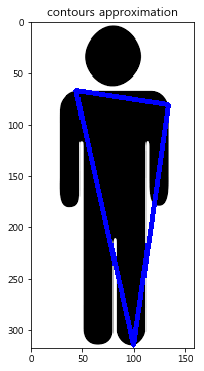

In [22]:
img = cv2.imread(imgfile)
img2 = img.copy()

# contour 그리기
cv2.drawContours(img, [approx], 0, (255, 0, 0), 3)

# 이미지 띄우기
cv2_plus.imshow(img,title = 'contours approximation', fig_size = (12,6))

일반적으로 2%~5%정도 설정하면 된단다. epsilon 계수를<br>
위의 경우 많이 일그러져 있어서 그럼

### epsilon 변화에 따른 contours
epsilon이 클수록 근사화가 높아짐

In [23]:
epsilon15 = 0.15 * cv2.arcLength(contours[0], True)
approx15 = cv2.approxPolyDP(contours[0], epsilon15, True)


epsilon7 = 0.07 * cv2.arcLength(contours[0], True)
approx7 = cv2.approxPolyDP(contours[0], epsilon7, True)

epsilon1 = 0.01 * cv2.arcLength(contours[0], True)
approx1 = cv2.approxPolyDP(contours[0], epsilon1, True)

epsilon01 = 0.001 * cv2.arcLength(contours[0], True)
approx01 = cv2.approxPolyDP(contours[0], epsilon01, True)

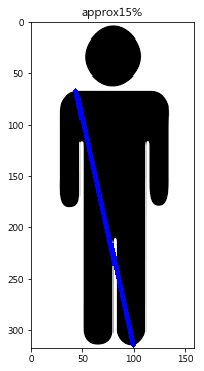

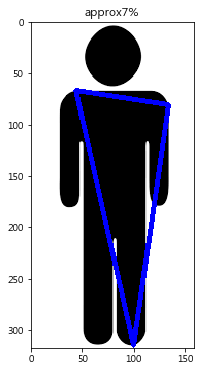

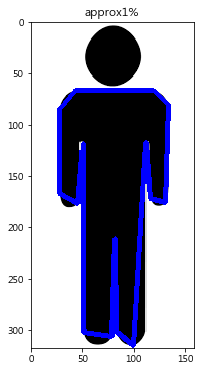

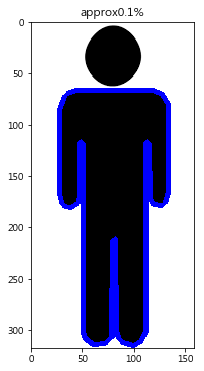

In [24]:
img1 = cv2.imread(imgfile)
img2 = img1.copy()
img3 = img1.copy()
img4 = img1.copy()

cv2.drawContours(img1, [approx15], 0, (255, 0, 0), 3)
cv2_plus.imshow(img1,title = 'approx15%', fig_size = (12,6))
cv2.drawContours(img2, [approx7], 0, (255, 0, 0), 3)
cv2_plus.imshow(img2,title = 'approx7%', fig_size = (12,6))
cv2.drawContours(img3, [approx1], 0, (255, 0, 0), 3)
cv2_plus.imshow(img3,title = 'approx1%', fig_size = (12,6))
cv2.drawContours(img4, [approx01], 0, (255, 0, 0), 3)
cv2_plus.imshow(img4,title = 'approx0.1%', fig_size = (12,6))
